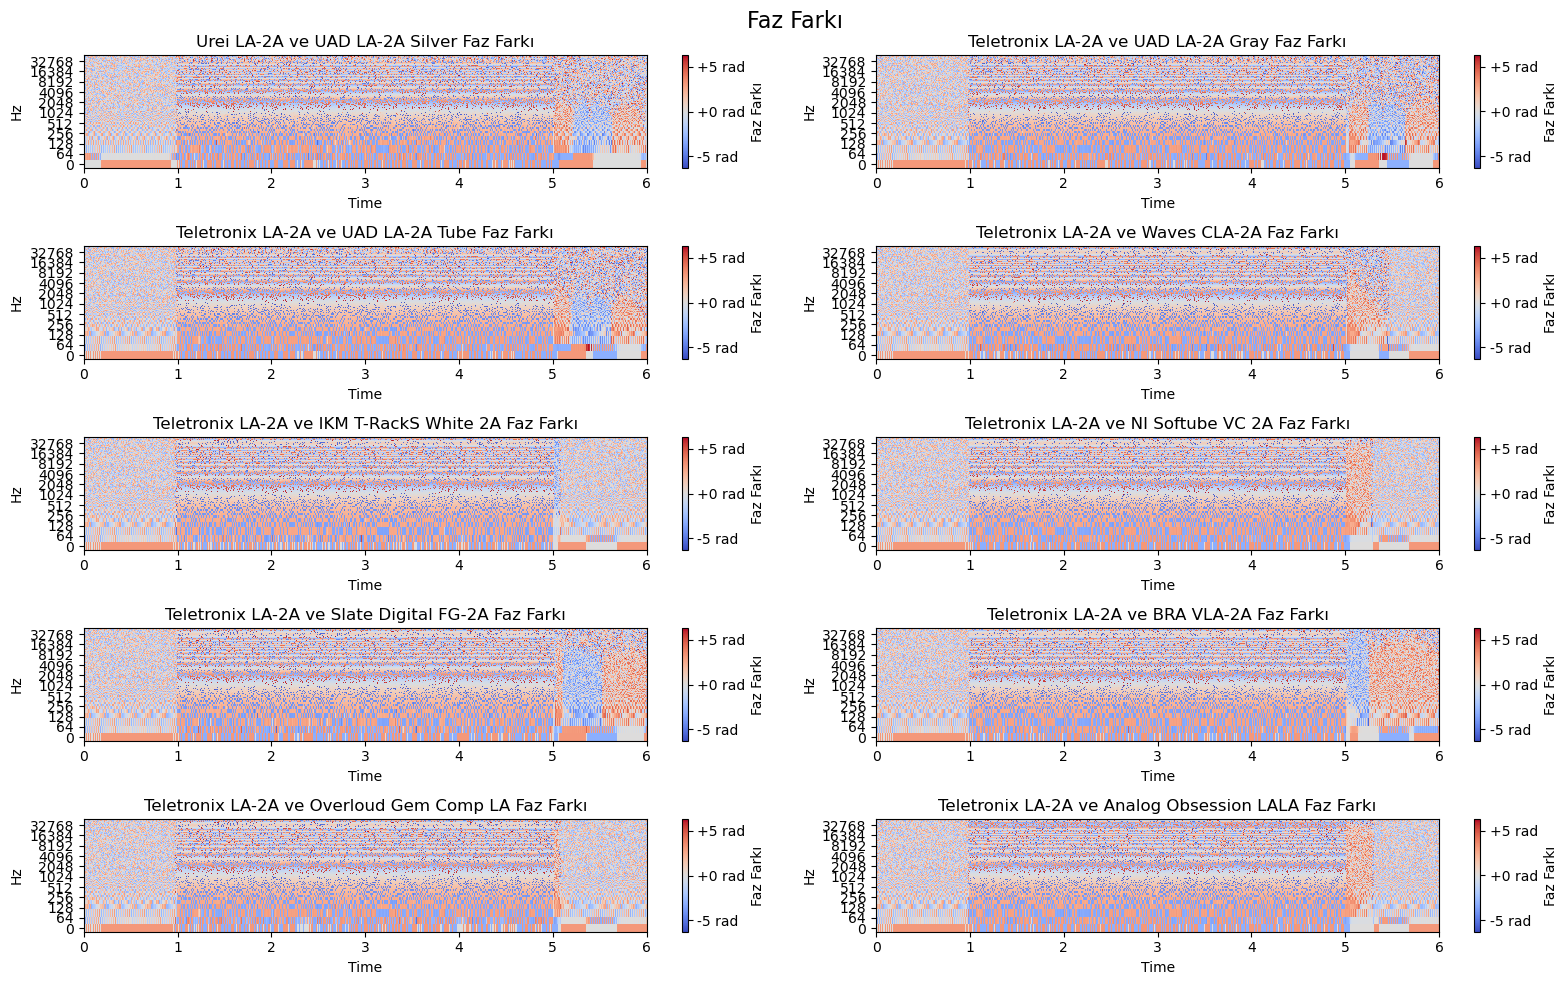

In [3]:
# Referans bir ses sinyali ile diğer ses sinyalleri arasındaki faz farklarını karşılaştırmak ve grafiksel olarak sunmaktır.
# İki ses sinyali arasındaki faz farkını radian cinsinden renk haritasıyla gösteriyor.
# Kırmızı (pozitif rad): İki sinyal arasında faz farkı var ve bir sinyal diğerinin gerisinde.
# Mavi (negatif rad): İkinci sinyal önde.
# Beyaz veya nötr renk: Faz farkı az veya yok.

# White noise, tüm frekanslarda eşit enerjiye sahip bir sinyaldir.
# Bu, analiz edilen tüm frekans bantlarında faz farklarını aynı anda incelemeye olanak sağlar.

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/processed/teletronix_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/urei_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_gray_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_silver_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_tube_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/waves_cla-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ikm_white-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ni_softube_vc-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ss_fg-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/bra_vla-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/overloud_gem-comp-la_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ao_lala_white_noise.wav",
]

# Dosya etiketleri
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Karşılaştırma kuralları
main_reference = 0  # Teletronix LA-2A
urei_index = 1  # Urei LA-2A
silver_index = 3  # UAD LA-2A Silver

# Faz farkı görselleştirme fonksiyonu
def plot_phase_difference(y_ref, sr_ref, y_comp, sr_comp, title, ax):
    # STFT hesaplama
    S_ref = librosa.stft(y_ref)
    S_comp = librosa.stft(y_comp)

    # Faz farkı hesaplama
    phase_ref = np.angle(S_ref)
    phase_comp = np.angle(S_comp)
    phase_diff = phase_ref - phase_comp

    # Faz farkını görselleştirme
    img = librosa.display.specshow(
        phase_diff, sr=sr_ref, x_axis="time", y_axis="log", cmap="coolwarm", ax=ax
    )
    ax.set_title(title)
    plt.colorbar(img, ax=ax, format="%+2.0f rad", label="Faz Farkı")

# Grafik düzeni için alt eksen ayarı
n_comparisons = len(audio_files) - 2  # Urei ve Silver karşılaştırmalarını hesaba kat
n_cols = 2
n_rows = (n_comparisons + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 2))
axes = axes.flatten()

plot_idx = 0

# Urei LA-2A ile sadece UAD Silver karşılaştırması
y_urei, sr_urei = librosa.load(audio_files[urei_index], sr=None)
y_silver, sr_silver = librosa.load(audio_files[silver_index], sr=None)

plot_phase_difference(
    y_urei,
    sr_urei,
    y_silver,
    sr_silver,
    f"{audio_labels[urei_index]} ve {audio_labels[silver_index]} Faz Farkı",
    axes[plot_idx],
)
plot_idx += 1

# Teletronix LA-2A ile diğer karşılaştırmalar
y_main_ref, sr_main_ref = librosa.load(audio_files[main_reference], sr=None)

for idx, (file, label) in enumerate(zip(audio_files, audio_labels)):
    if idx in {main_reference, urei_index, silver_index}:
        continue  # Urei ve Silver, farklı kurallara göre karşılaştırıldı

    # Dosyayı yükle
    y_comp, sr_comp = librosa.load(file, sr=None)

    # Grafik çizimi
    plot_phase_difference(
        y_main_ref,
        sr_main_ref,
        y_comp,
        sr_comp,
        f"{audio_labels[main_reference]} ve {label} Faz Farkı",
        axes[plot_idx],
    )
    plot_idx += 1

# Boş kalan eksenleri silme
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Faz Farkı", fontsize=16)
plt.show()